In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from utils import *

Populating the interactive namespace from numpy and matplotlib


# The purpose of this notebook is to show:
1. how to load the pretrained model (i.e., DNN decoder).
2. how to load and visualize the population vectors (`PV`).
3. convert `PV`:(N_samples, N_neurons) into `X`:(N_samples, B_bins, N_neurons) using function `pv_2_spv` , `X` is the decoder input.
4. how to use the pretrained model to decode the locations (`redec_pos`) from PVs using same parameters/procedure as the real-time decoding.
5. compare the offline decoding result (`redec_pos`) with the stored real-time decoding result (`dec_pos`).

This notebook uses **Jedi** task data.

## wr112

In [2]:
model, neuron_idx, B_bins = load_pretrained_model(rat='rat1', task='Jedi')
model.cuda();

In [3]:
pv = np.load('./data/Jedi/wr112_0901_JEDI_PV.npy')
pv_t = np.load('./data/Jedi/wr112_0901_JEDI_PV_t.npy')
dec_pos = np.load('./data/Jedi/wr112_0901_JEDI_dec_pos.npy')

In [4]:
pv.shape, pv_t.shape, dec_pos.shape, pv.shape[0] - dec_pos.shape[0]

((16280, 253), (16280,), (16231, 2), 49)

In [5]:
X = pv_2_spv(pv, B_bins=B_bins, padding=False)
X.shape

(16231, 50, 253)

In [9]:
# X = X[:, :, neuron_idx]

In [10]:
@interact(i = (B_bins, X.shape[0]-1))
def visualiz_pv(i=B_bins-1):
    fig, ax = plt.subplots(1, 1, figsize=(X.shape[2]//20, X.shape[1]//20))
    ax.imshow(X[i], aspect='auto', cmap=neo)
    ax.set_xlabel('place units')
    ax.set_ylabel('time bins')
    plt.show();

interactive(children=(IntSlider(value=50, description='i', max=16230, min=50), Output()), _dom_classes=('widge…

In [7]:
redec_pos = decode(model, X, neuron_idx, cuda=True, mimic_realtime=True)
# redec_pos = decode(model, X, neuron_idx, cuda=True, mimic_realtime=False, smooth=False)

In [8]:
print(f'euclidean distance between offline and online decoding results: {np.percentile(np.linalg.norm(redec_pos - dec_pos, axis=1), 100) * 10: .1f} mm')

euclidean distance between offline and online decoding results:  0.0 mm


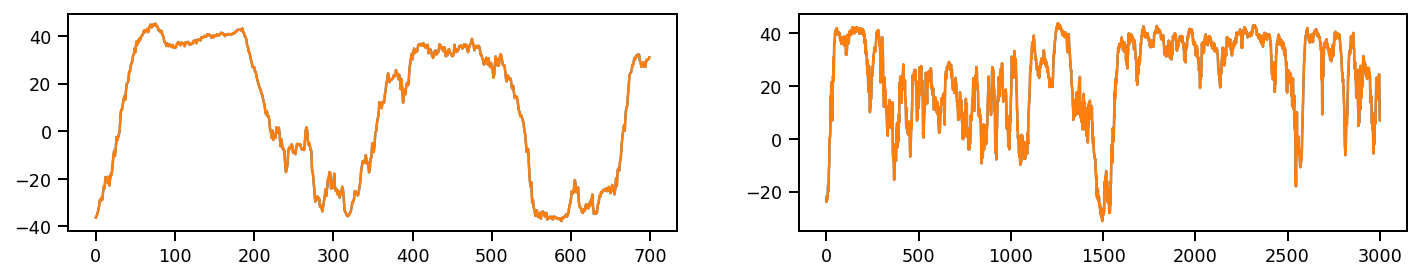

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,2))
ax[0].plot(redec_pos[2500:3200, 0]);
ax[0].plot(dec_pos[2500:3200, 0]);
ax[1].plot(redec_pos[-3000:, 0]);
ax[1].plot(dec_pos[-3000:, 0]);

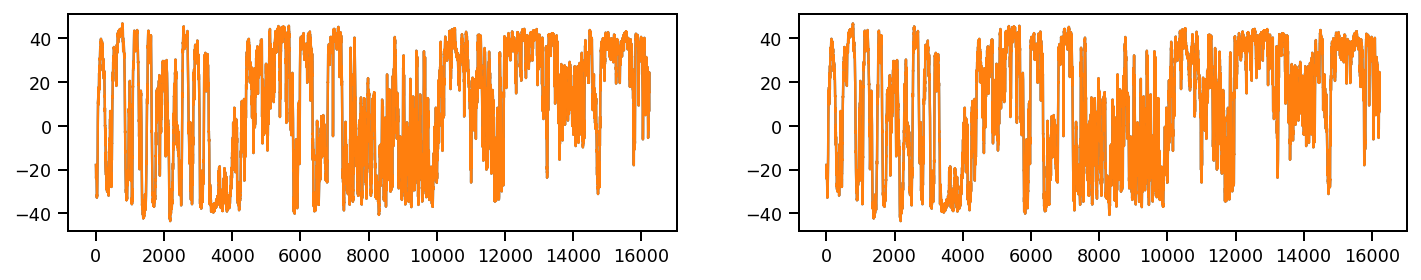

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,2))
ax[0].plot(redec_pos[:, 0]);
ax[0].plot(dec_pos[:, 0]);
ax[1].plot(redec_pos[:, 0]);
ax[1].plot(dec_pos[:, 0]);

In [11]:
pv_t.shape, pv.shape, dec_pos.shape, redec_pos.shape

((16280,), (16280, 253), (16231, 2), (16231, 2))

# wr118

In [12]:
model, neuron_idx, B_bins = load_pretrained_model(rat='rat2', task='Jedi')
model.cuda();

In [13]:
pv = np.load('./data/Jedi/wr118_0829_JEDI_PV.npy')
pv_t = np.load('./data/Jedi/wr118_0829_JEDI_PV_t.npy')
dec_pos = np.load('./data/Jedi/wr118_0829_JEDI_dec_pos.npy')

In [14]:
pv.shape, pv_t.shape, dec_pos.shape, pv.shape[0] - dec_pos.shape[0]

((17526, 288), (17526,), (17477, 2), 49)

In [15]:
X = pv_2_spv(pv, B_bins=B_bins, padding=False)
X.shape

(17477, 50, 288)

In [16]:
@interact(i = (B_bins, X.shape[0]-1))
def visualiz_pv(i=B_bins-1):
    fig, ax = plt.subplots(1, 1, figsize=(X.shape[2]//20, X.shape[1]//20))
    ax.imshow(X[i], aspect='auto', cmap=neo)
    ax.set_xlabel('place units')
    ax.set_ylabel('time bins')
    plt.show();

interactive(children=(IntSlider(value=50, description='i', max=17476, min=50), Output()), _dom_classes=('widge…

In [17]:
redec_pos = decode(model, X, neuron_idx, cuda=True, mimic_realtime=True)
# redec_pos = decode(model, X, neuron_idx, cuda=True, mimic_realtime=False, smooth=False)

In [21]:
print(f'euclidean distance between offline and online decoding results: {np.percentile(np.linalg.norm(redec_pos - dec_pos, axis=1), 100.0) * 10: .1f} mm')

euclidean distance between offline and online decoding results:  0.0 mm


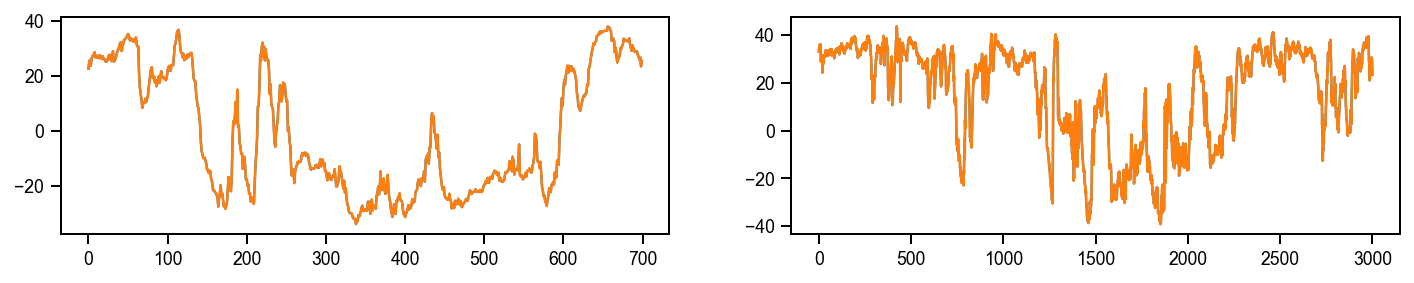

In [22]:
fig, ax = plt.subplots(1,2, figsize=(12,2))
ax[0].plot(redec_pos[2500:3200, 0]);
ax[0].plot(dec_pos[2500:3200, 0]);
ax[1].plot(redec_pos[-3000:, 0]);
ax[1].plot(dec_pos[-3000:, 0]);

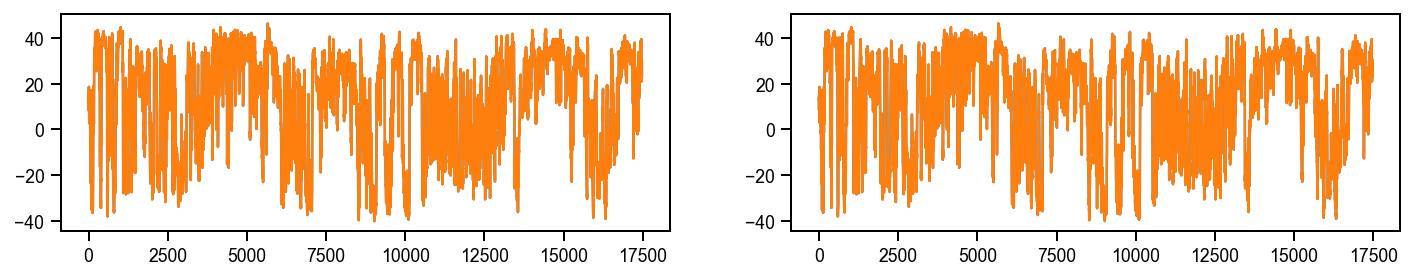

In [23]:
fig, ax = plt.subplots(1,2, figsize=(12,2))
ax[0].plot(redec_pos[:, 0]);
ax[0].plot(dec_pos[:, 0]);
ax[1].plot(redec_pos[:, 0]);
ax[1].plot(dec_pos[:, 0]);

In [25]:
pv_t.shape, pv.shape, dec_pos.shape, redec_pos.shape, pv.shape[0] - redec_pos.shape[0]

((17526,), (17526, 288), (17477, 2), (17477, 2), 49)

# wr121

In [26]:
model, neuron_idx, B_bins = load_pretrained_model(rat='rat3', task='Jedi')
model.cuda();

In [27]:
pv = np.load('./data/Jedi/wr121_0915_JEDI_PV.npy')
pv_t = np.load('./data/Jedi/wr121_0915_JEDI_PV_t.npy')
dec_pos = np.load('./data/Jedi/wr121_0915_JEDI_dec_pos.npy')

In [28]:
pv.shape, pv_t.shape, dec_pos.shape, pv.shape[0] - dec_pos.shape[0]

((27399, 138), (27399,), (27350, 2), 49)

In [29]:
X = pv_2_spv(pv, B_bins=B_bins, padding=False)
X.shape

(27350, 50, 138)

In [30]:
@interact(i = (B_bins, X.shape[0]-1))
def visualiz_pv(i=B_bins-1):
    fig, ax = plt.subplots(1, 1, figsize=(X.shape[2]//20, X.shape[1]//20))
    ax.imshow(X[i], aspect='auto', cmap=neo)
    ax.set_xlabel('place units')
    ax.set_ylabel('time bins')
    plt.show();

interactive(children=(IntSlider(value=50, description='i', max=27349, min=50), Output()), _dom_classes=('widge…

In [31]:
redec_pos = decode(model, X, neuron_idx, cuda=True, mimic_realtime=True)
# redec_pos = decode(model, X, neuron_idx, cuda=True, mimic_realtime=False)

In [32]:
print(f'euclidean distance between offline and online decoding results: {np.percentile(np.linalg.norm(redec_pos - dec_pos, axis=1), 100.0) * 10: .1f} mm')

euclidean distance between offline and online decoding results:  0.0 mm


In [1]:
fig, ax = plt.subplots(1,2, figsize=(12,2))
ax[0].plot(redec_pos[2500:3200, 0]);
ax[0].plot(dec_pos[2500:3200, 0]);
ax[1].plot(redec_pos[-3000:, 0]);
ax[1].plot(dec_pos[-3000:, 0]);

NameError: name 'plt' is not defined

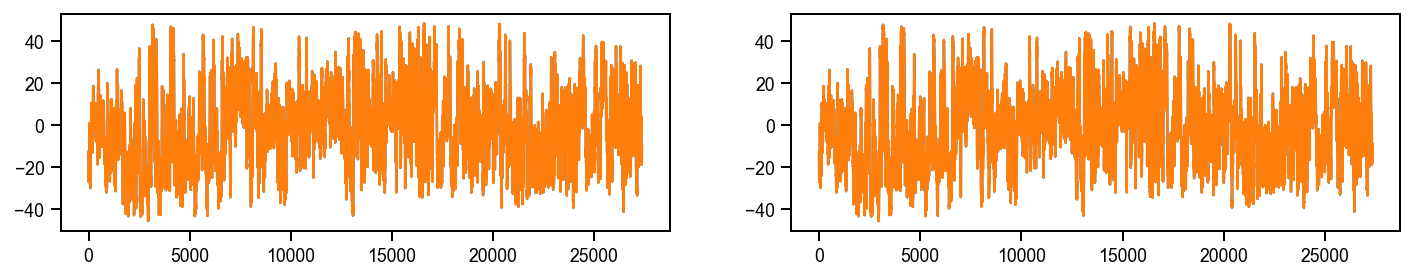

In [34]:
fig, ax = plt.subplots(1,2, figsize=(12,2))
ax[0].plot(redec_pos[:, 0]);
ax[0].plot(dec_pos[:, 0]);
ax[1].plot(redec_pos[:, 0]);
ax[1].plot(dec_pos[:, 0]);

In [35]:
pv_t.shape, pv.shape, dec_pos.shape, redec_pos.shape, pv.shape[0] - redec_pos.shape[0]

((27399,), (27399, 138), (27350, 2), (27350, 2), 49)